# Objective
perform Ensemble classification with Feature Reduction.

In [1]:
import numpy as np 
import pandas as pd 


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')



# Exploratory Analysis


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [5]:
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [6]:
train.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


# Visualize data

<Axes: >

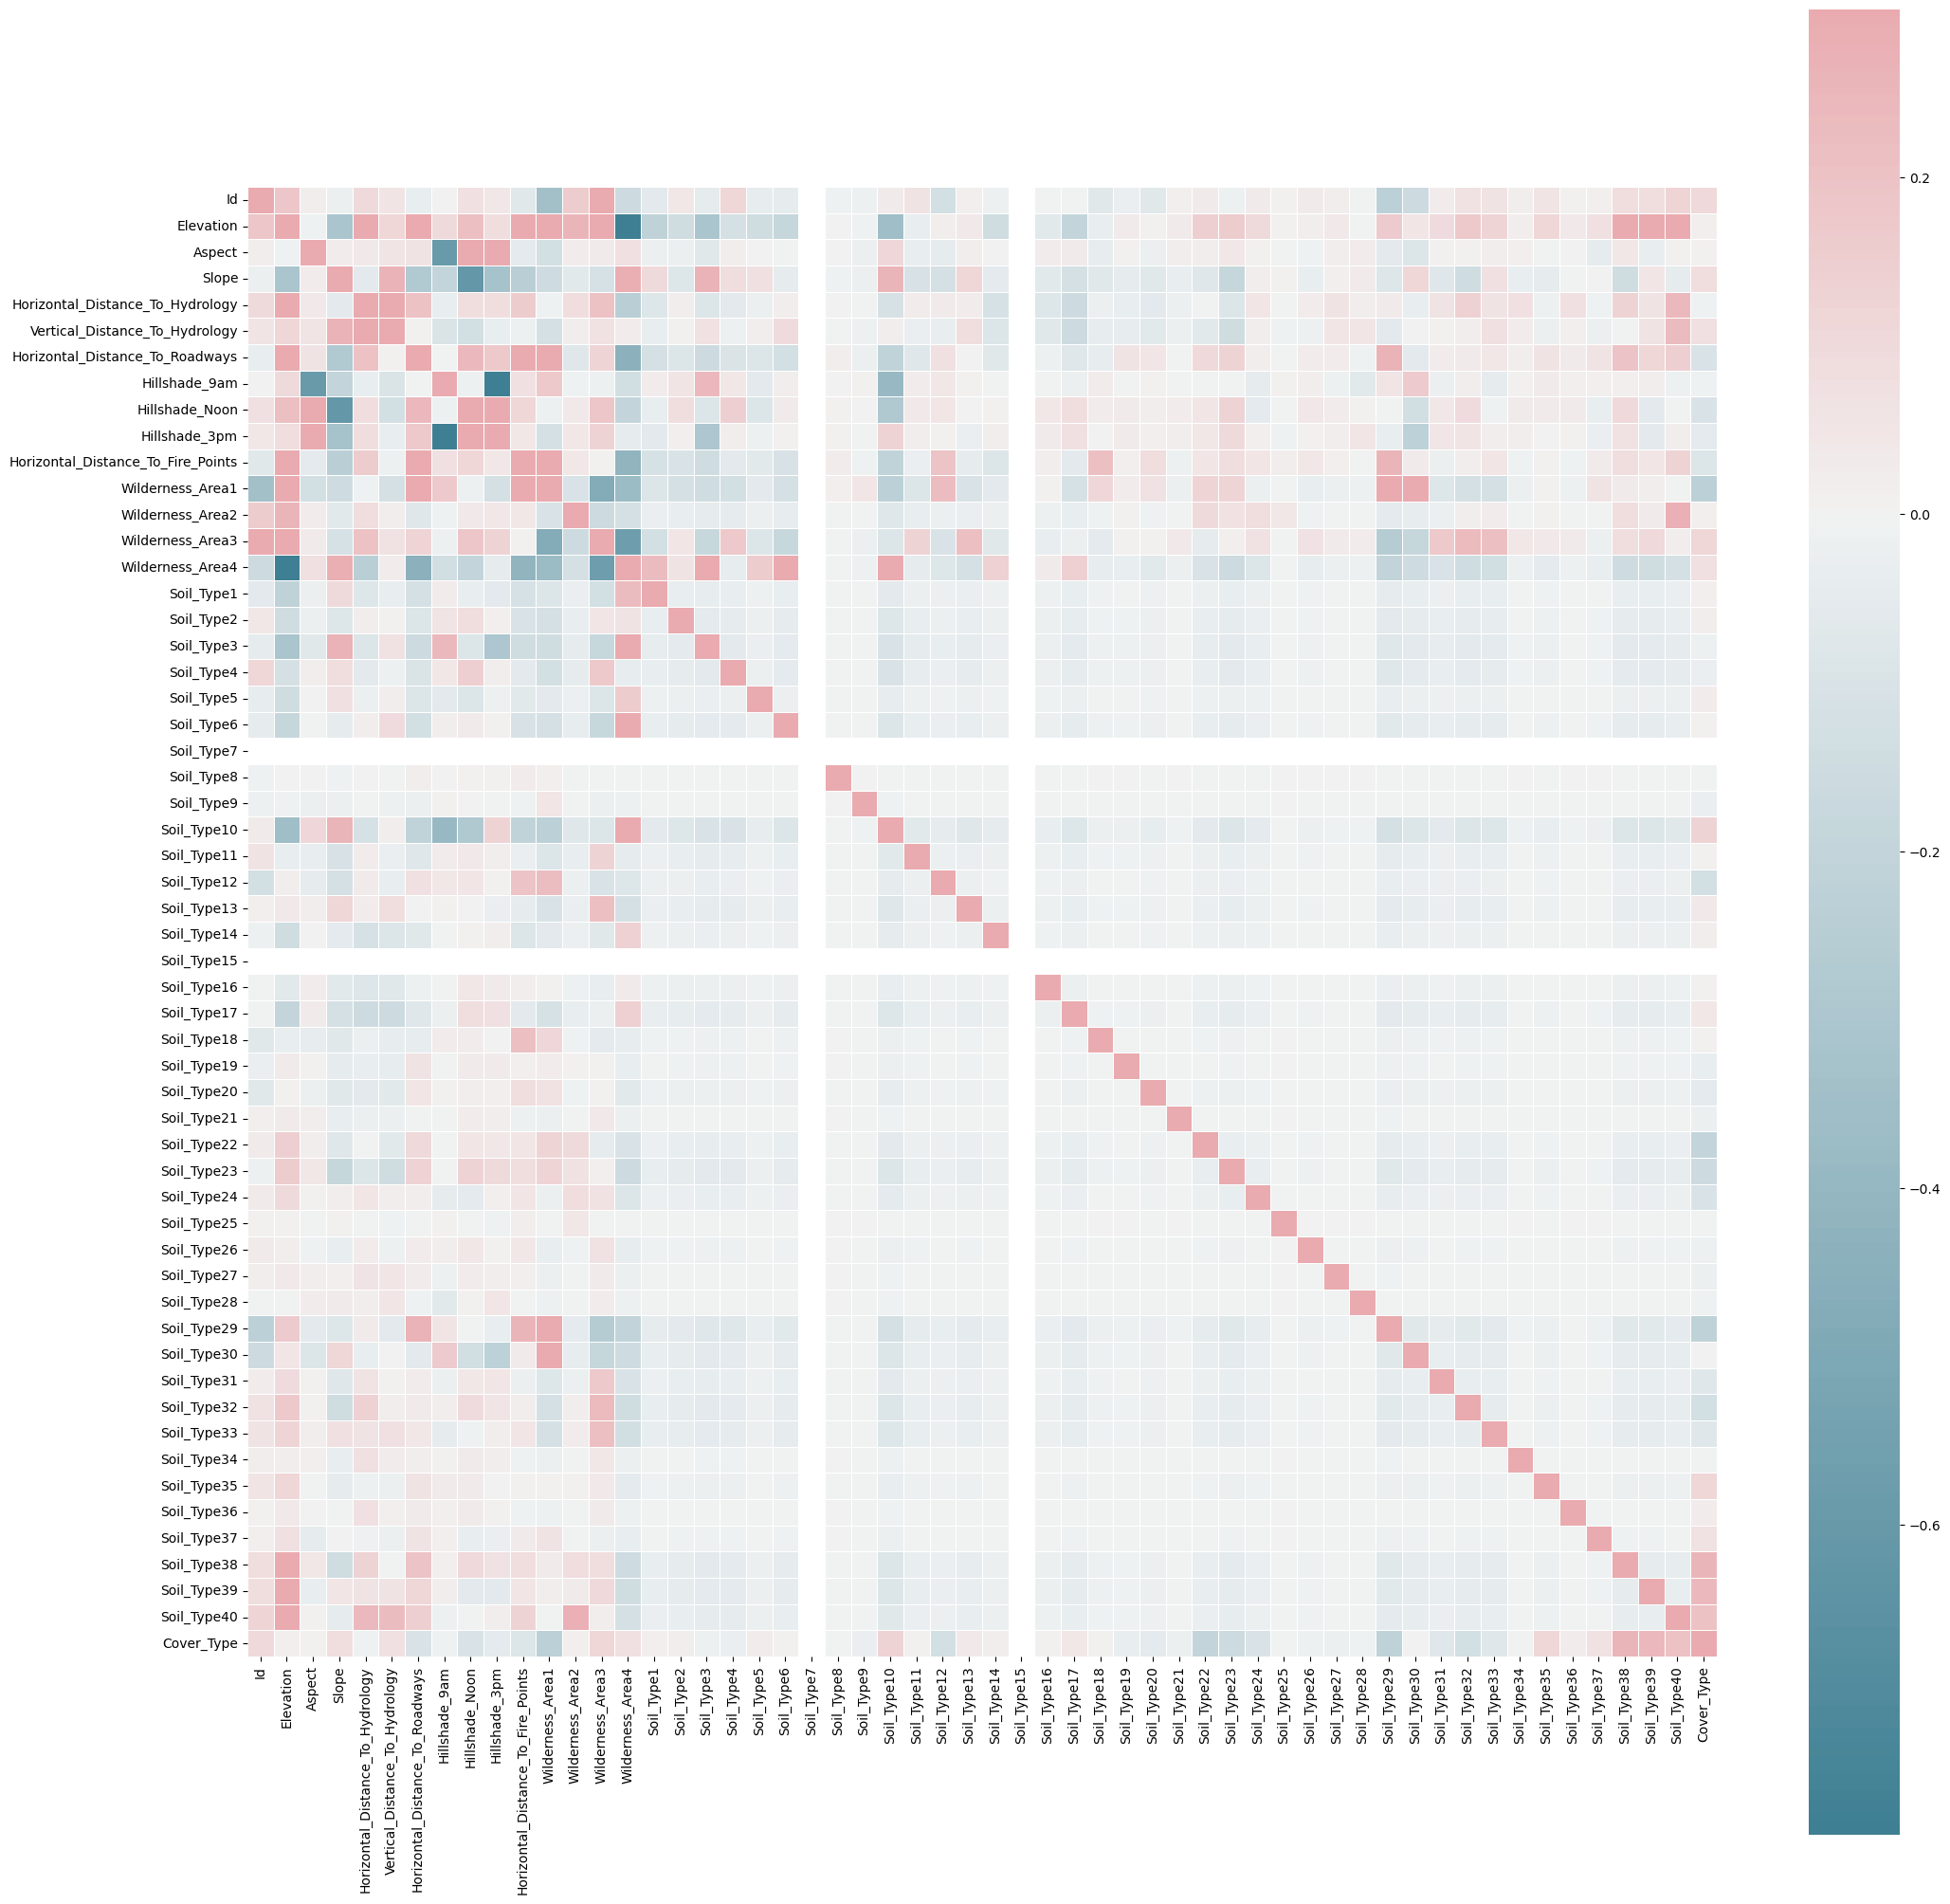

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


corr = train.corr()
f, ax = plt.subplots(figsize=(25, 25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5)

In [8]:
corr

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,1.000000,0.185496,0.017702,-0.020168,0.099637,0.055348,-0.033028,0.000786,0.073123,0.042524,-0.068739,-0.339861,0.158484,0.384219,-0.158451,-0.058451,0.045545,-0.045757,0.118214,-0.041713,-0.046017,NaN,-0.013159,-0.014219,0.032292,0.063372,-0.129930,0.015145,-0.016034,NaN,-0.003794,-0.002940,-0.070252,-0.029707,-0.069537,0.014734,0.035739,-0.017422,0.034019,0.005675,0.031176,0.024141,-0.005104,-0.231780,-0.157515,0.025826,0.068048,0.066887,0.022520,0.057480,0.009110,0.016040,0.086932,0.083376,0.122475,0.108363
Elevation,0.185496,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,0.443563,0.330417,0.261729,0.354025,-0.783651,-0.218818,-0.147947,-0.307523,-0.125342,-0.141478,-0.187354,NaN,0.002934,-0.010571,-0.357816,-0.037906,0.017432,0.039304,-0.140619,NaN,-0.066252,-0.200663,-0.035173,0.029808,0.008548,0.032509,0.146236,0.159872,0.097647,0.010586,0.020669,0.040019,-0.001077,0.165304,0.048204,0.093191,0.172349,0.123821,0.021876,0.120157,0.040571,0.073825,0.323440,0.296405,0.306755,0.016090
Aspect,0.017702,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,-0.052169,-0.131262,0.028238,0.032578,0.075228,-0.024538,-0.020970,-0.069120,0.018019,0.000343,-0.006066,NaN,0.001723,-0.019391,0.111959,-0.034549,-0.044142,0.024312,0.001181,NaN,0.027121,0.029870,-0.042140,0.007570,-0.023330,0.018815,0.022301,0.041880,0.005480,-0.002340,-0.009775,0.018986,0.026330,-0.063428,-0.086897,0.008160,0.003700,0.018719,0.012927,-0.004235,0.003160,-0.046309,0.043860,-0.031342,0.007208,0.008015
Slope,-0.020168,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,-0.239527,-0.152820,-0.065923,-0.113033,0.286985,0.099355,-0.081498,0.265541,0.087841,0.074720,-0.047868,NaN,-0.012989,-0.022220,0.255804,-0.109798,-0.115088,0.119863,-0.054085,NaN,-0.064321,-0.124375,-0.069326,-0.047742,-0.068508,-0.033935,-0.076393,-0.184528,0.017982,0.011062,-0.030700,0.012295,0.036082,-0.083108,0.118725,-0.076851,-0.147258,0.072027,-0.030590,-0.048855,-0.004570,0.003129,-0.148342,0.051900,-0.043513,0.087722
Horizontal_Distance_To_Hydrology,0.099637,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,0.158817,-0.009402,0.087484,0.200532,-0.239303,-0.084766,0.024234,-0.089578,-0.059398,-0.025247,0.021203,NaN,0.002819,-0.005523,-0.112852,0.026150,0.034306,0.026595,-0.111878,NaN,-0.084804,-0.159717,-0.018282,-0.033946,-0.062873,-0.025207,-0.007840,-0.087963,0.046915,-0.004615,0.027879,0.064616,0.019663,0.033854,-0.032540,0.060886,0.138275,0.062121,0.072485,-0.015446,0.077251,-0.009549,0.131444,0.066284,0.242304,-0.010515
Vertical_Distance_To_Hydrology,0.055348,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,-0.015048,-0.117835,0.017108,0.069884,0.027321,-0.034309,0.005436,0.070414,-0.016543,0.018550,0.094701,NaN,-0.007049,-0.014610,0.018305,-0.029364,-0.033237,0.085309,-0.087445,NaN,-0.070201,-0.155574,-0.039745,-0.040898,-0.065710,-0.022197,-0.064122,-0.144317,0.017148,-0.011697,-0.016315,0.047304,0.046287,-0.056267,-0.000083,0.006247,0.020298,0.077167,0.028910,-0.021662,0.015680,-0.020717,-0.008989,0.058981,0.227110,0.075647
Horizontal_Distance_To_Roadways,-0.033028,0.578659

In [9]:
# soil_Type7 and soil_Type15 doesn't haveany correlation with the output cover_Type
train.drop(['Id'], inplace = True, axis = 1 )
train.drop(['Soil_Type15' , "Soil_Type7"], inplace = True, axis = 1 )
test.drop(['Soil_Type15' , "Soil_Type7"], inplace = True, axis = 1 )


# Feature Construction


In [11]:
train['HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Fire_Points'])
train['Neg_HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Fire_Points'])
train['HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Roadways'])
train['Neg_HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Roadways'])
train['HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']+train['Horizontal_Distance_To_Roadways'])
train['Neg_HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']-train['Horizontal_Distance_To_Roadways'])

train['Neg_Elevation_Vertical'] = train['Elevation']-train['Vertical_Distance_To_Hydrology']
train['Elevation_Vertical'] = train['Elevation']+train['Vertical_Distance_To_Hydrology']

train['mean_hillshade'] =  (train['Hillshade_9am']  + train['Hillshade_Noon'] + train['Hillshade_3pm'] ) / 3

train['Mean_HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Fire_Points'])/2
train['Mean_HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Roadways'])/2
train['Mean_HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']+train['Horizontal_Distance_To_Roadways'])/2

train['MeanNeg_Mean_HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Fire_Points'])/2
train['MeanNeg_HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Roadways'])/2
train['MeanNeg_HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']-train['Horizontal_Distance_To_Roadways'])/2

train['Slope2'] = np.sqrt(train['Horizontal_Distance_To_Hydrology']**2+train['Vertical_Distance_To_Hydrology']**2)
train['Mean_Fire_Hydrology_Roadways']=(train['Horizontal_Distance_To_Fire_Points'] + train['Horizontal_Distance_To_Hydrology'] + train['Horizontal_Distance_To_Roadways']) / 3
train['Mean_Fire_Hyd']=(train['Horizontal_Distance_To_Fire_Points'] + train['Horizontal_Distance_To_Hydrology']) / 2 

train["Vertical_Distance_To_Hydrology"] = abs(train['Vertical_Distance_To_Hydrology'])

train['Neg_EHyd'] = train.Elevation-train.Horizontal_Distance_To_Hydrology*0.2


test['HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Fire_Points'])
test['Neg_HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Fire_Points'])
test['HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Roadways'])
test['Neg_HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Roadways'])
test['HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']+test['Horizontal_Distance_To_Roadways'])
test['Neg_HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']-test['Horizontal_Distance_To_Roadways'])

test['Neg_Elevation_Vertical'] = test['Elevation']-test['Vertical_Distance_To_Hydrology']
test['Elevation_Vertical'] = test['Elevation'] + test['Vertical_Distance_To_Hydrology']

test['mean_hillshade'] = (test['Hillshade_9am']  + test['Hillshade_Noon']  + test['Hillshade_3pm'] ) / 3

test['Mean_HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Fire_Points'])/2
test['Mean_HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Roadways'])/2
test['Mean_HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']+test['Horizontal_Distance_To_Roadways'])/2

test['MeanNeg_Mean_HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Fire_Points'])/2
test['MeanNeg_HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Roadways'])/2
test['MeanNeg_HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']-test['Horizontal_Distance_To_Roadways'])/2

test['Slope2'] = np.sqrt(test['Horizontal_Distance_To_Hydrology']**2+test['Vertical_Distance_To_Hydrology']**2)
test['Mean_Fire_Hydrology_Roadways']=(test['Horizontal_Distance_To_Fire_Points'] + test['Horizontal_Distance_To_Hydrology'] + test['Horizontal_Distance_To_Roadways']) / 3 
test['Mean_Fire_Hyd']=(test['Horizontal_Distance_To_Fire_Points'] + test['Horizontal_Distance_To_Hydrology']) / 2


test['Vertical_Distance_To_Hydrology'] = abs(test["Vertical_Distance_To_Hydrology"])

test['Neg_EHyd'] = test.Elevation-test.Horizontal_Distance_To_Hydrology*0.2

In [12]:
train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,HorizontalHydrology_HorizontalFire,Neg_HorizontalHydrology_HorizontalFire,HorizontalHydrology_HorizontalRoadways,Neg_HorizontalHydrology_HorizontalRoadways,HorizontalFire_Points_HorizontalRoadways,Neg_HorizontalFire_Points_HorizontalRoadways,Neg_Elevation_Vertical,Elevation_Vertical,mean_hillshade,Mean_HorizontalHydrology_HorizontalFire,Mean_HorizontalHydrology_HorizontalRoadways,Mean_HorizontalFire_Points_HorizontalRoadways,MeanNeg_Mean_HorizontalHydrology_HorizontalFire,MeanNeg_HorizontalHydrology_HorizontalRoadways,MeanNeg_HorizontalFire_Points_HorizontalRoadways,Slope2,Mean_Fire_Hydrology_Roadways,Mean_Fire_Hyd,Neg_EHyd
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,6537,-6021,768,-252,6789,5769,2596,2596,200.333333,3268.5,384.0,3394.5,-3010.5,-126.0,2884.5,258.000000,2349.000000,3268.5,2544.4
1,2590,56,2,212,6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,6437,-6013,602,-178,6615,5835,2596,2584,202.000000,3218.5,301.0,3307.5,-3006.5,-89.0,2917.5,212.084889,2275.666667,3218.5,2547.6
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6389,-5853,3448,-2912,9301,2941,2739,2869,202.333333,3194.5,1724.0,4650.5,-2926.5,-1456.0,1470.5,275.769832,3189.666667,3194.5,2750.4
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,6453,-5969,3332,-2848,9301,3121,2667,2903,199.333333,3226.5,1666.0,4650.5,-2984.5,-1424.0,1560.5,269.235956,3181.000000,3226.5,2736.6
4,2595,45,2,153,1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,6325,-6019,544,-238,6563,5781,2596,2594,201.333333,3162.5,272.0,3281.5,-3009.5,-119.0,2890.5,153.003268,2238.666667,3162.5,2564.4


In [22]:
from sklearn.model_selection import train_test_split
x = train.drop(['Cover_Type'], axis = 1)
y = train['Cover_Type']
print( y.head() )

x_train, x_test, y_train, y_test = train_test_split( x.values, y.values, test_size=0.05, random_state=42 )

0    5
1    5
2    2
3    2
4    5
Name: Cover_Type, dtype: int64


# reduction with PCA

In [23]:
# Dimensionality Reduction with PCA
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

pca = PCA(n_components=10)
pca.fit(x_train_scaled)
x_train_reduced = pca.transform(x_train_scaled)
x_test_reduced = pca.transform(x_test_scaled)


# Feature Selection


In [24]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

dataset = datasets.load_iris()

clf = ExtraTreesClassifier()
clf.fit(x_train,y_train)

z = clf.feature_importances_

df = pd.DataFrame()
print(len(z))
print(len(list(x.columns.values)))

df["values"] = z
df['column'] = list(x.columns.values)

df.sort_values(by='values', ascending=False, inplace = True)
df.head(100)

71
71


,values,column
70,7.632310e-02,Neg_EHyd
58,7.407460e-02,Neg_Elevation_Vertical
0,6.668036e-02,Elevation
59,5.199609e-02,Elevation_Vertical
13,4.403538e-02,Wilderness_Area4
22,2.641040e-02,Soil_Type10
68,2.284016e-02,Mean_Fire_Hydrology_Roadways
63,2.250483e-02,Mean_HorizontalFire_Points_HorizontalRoadways
55,2.241871e-02,Neg_HorizontalHydrology_HorizontalRoadways
5,2.224338e-02,Horizontal_Distance_To_Roadways


In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn import decomposition

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# XGBoost

In [18]:
pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 8.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Accuracy 

In [19]:

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

clf = ExtraTreesClassifier(n_estimators=950, random_state=0)

clf.fit(x_train, y_train)
print('Accuracy of classifier on training set: {:.2f}'.format(clf.score(x_train, y_train) * 100))
print('Accuracy of classifier on test set: {:.2f}'.format(clf.score(x_test, y_test) * 100))

Accuracy of classifier on training set: 100.00
Accuracy of classifier on test set: 92.72


# conclusion
This analysis investigated the effectiveness of ensemble classification with feature reduction for forest cover type prediction. Exploratory data analysis revealed key characteristics of the data, and feature engineering techniques were employed to create potentially informative features. Feature selection with ExtraTreesClassifier helped identify the most relevant features for the task.

Dimensionality reduction using Principal Component Analysis (PCA) was implemented to reduce the feature space while retaining important information. The performance of ensemble classifier were evaluated using metrics.
